# Notebook de regresión lineal

## Física Computacional I.

**Elaborado por Santiago Echeverri Arteaga**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import boxcox
from scipy.special import inv_boxcox

In [3]:
import warnings
warnings.simplefilter("ignore")

### Linear Regression

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import (StandardScaler, PolynomialFeatures)

In [5]:
lr = LinearRegression()

In [18]:
#Polinomial Features a X
pf = PolynomialFeatures(degree=2, include_bias=False)
X_pf = pf.fit_transform(X)

# División en Entrenamiento/Prueba
X_train, X_test, y_train, y_test = train_test_split(X_pf, y, test_size=0.3, random_state=72018)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

# Escalado estándar de X_train
# OJO: Solo se hace fit_transform a X_train
#      y después se hace transform a X_test
s = StandardScaler()
X_train_s = s.fit_transform(X_train)

# BocCox a Target
bc_result2 = boxcox(y_train)
y_train_bc = bc_result2[0]
lam2 = bc_result2[1]

# Entrenamiento del modelo
lr.fit(X_train_s, y_train_bc)

# Transformar los X de prueba con el MISMO ESCALADO
X_test_s = s.transform(X_test)

#Predecir los nuevos valores Y
y_pred_bc = lr.predict(X_test_s)

# Para comparar los valores predichos con los reales se necesita hacer BOXCOX INVERSA con el MISMO LAMBDA
y_pred_tran = inv_boxcox(y_pred_bc,lam2)

# Se calcula el R2 del ajuste
r2_score(y_pred_tran,y_test)

(354, 104)
(152, 104)
(354,)
(152,)


0.8794001851338618

In [19]:
#Compartivamente se hace el mismo procedimiento pero sin transformación
lr = LinearRegression()
lr.fit(X_train_s,y_train)
lr_pred = lr.predict(X_test_s)
r2_score(lr_pred,y_test)

0.855520209806417

#### Regresión Lineal con OneHotEncoding -- Análsis de la compensación Bias-Variace

In [9]:
import os
csv= [i for i in os.listdir() if ".csv" in i]
csv

['Ames_Housing_Sales.csv', 'X_Y_Sinusoid_Data.csv']

In [13]:
import os
import pandas as pd
import numpy as np

# Importar datos usando una ruta de donde están los archivos (Lista de cadenas) y el nombre del documento
filepath = os.path.join(os.getcwd(),csv[0])
data = pd.read_csv(filepath)

data.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,SalePrice
0,856.0,854.0,0.0,None,3,1Fam,TA,No,706.0,0.0,...,0.0,Pave,8,856.0,AllPub,0.0,2003,2003,2008,208500.0
1,1262.0,0.0,0.0,None,3,1Fam,TA,Gd,978.0,0.0,...,0.0,Pave,6,1262.0,AllPub,298.0,1976,1976,2007,181500.0
2,920.0,866.0,0.0,None,3,1Fam,TA,Mn,486.0,0.0,...,0.0,Pave,6,920.0,AllPub,0.0,2001,2002,2008,223500.0
3,961.0,756.0,0.0,None,3,1Fam,Gd,No,216.0,0.0,...,0.0,Pave,7,756.0,AllPub,0.0,1915,1970,2006,140000.0
4,1145.0,1053.0,0.0,None,4,1Fam,TA,Av,655.0,0.0,...,0.0,Pave,9,1145.0,AllPub,192.0,2000,2000,2008,250000.0


In [14]:
data.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1379 entries, 0 to 1378
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   1stFlrSF       1379 non-null   float64
 1   2ndFlrSF       1379 non-null   float64
 2   3SsnPorch      1379 non-null   float64
 3   Alley          1379 non-null   object 
 4   BedroomAbvGr   1379 non-null   int64  
 5   BldgType       1379 non-null   object 
 6   BsmtCond       1379 non-null   object 
 7   BsmtExposure   1379 non-null   object 
 8   BsmtFinSF1     1379 non-null   float64
 9   BsmtFinSF2     1379 non-null   float64
 10  BsmtFinType1   1379 non-null   object 
 11  BsmtFinType2   1379 non-null   object 
 12  BsmtFullBath   1379 non-null   int64  
 13  BsmtHalfBath   1379 non-null   int64  
 14  BsmtQual       1379 non-null   object 
 15  BsmtUnfSF      1379 non-null   float64
 16  CentralAir     1379 non-null   object 
 17  Condition1     1379 non-null   object 
 18  Conditio

In [15]:
data.dtypes.value_counts()

object     43
float64    21
int64      16
dtype: int64

In [22]:
# Select the object (string) columns
mask = data.dtypes == object
categorical_cols = data.columns[mask]
categorical_cols

Index(['Alley', 'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'BsmtQual', 'CentralAir', 'Condition1', 'Condition2',
       'Electrical', 'ExterCond', 'ExterQual', 'Exterior1st', 'Exterior2nd',
       'Fence', 'FireplaceQu', 'Foundation', 'Functional', 'GarageCond',
       'GarageFinish', 'GarageQual', 'GarageType', 'Heating', 'HeatingQC',
       'HouseStyle', 'KitchenQual', 'LandContour', 'LandSlope', 'LotConfig',
       'LotShape', 'MSZoning', 'MasVnrType', 'MiscFeature', 'Neighborhood',
       'PavedDrive', 'PoolQC', 'RoofMatl', 'RoofStyle', 'SaleCondition',
       'SaleType', 'Street', 'Utilities'],
      dtype='object')

In [30]:
# Cuántos valores únicos hay en cada categoría? Ordenados de mayor a menor
num_ohc_cols = (data[categorical_cols].apply(lambda x: x.nunique()).sort_values(ascending=False))

# Filtrar las que tienen más de un valor
small_num_ohc_cols = num_ohc_cols.loc[num_ohc_cols>1]

# Se eliminaría una de las creadas por OneHotEncoding para que no se de overfitting
small_num_ohc_cols -= 1

# ¿Cuántas habría?
small_num_ohc_cols.sum()

215

***Las siguientes líneas son para explicar lo que hace el ciclo for que sigue***

In [25]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
data_ohc = data.copy()

# Los encoders
le = LabelEncoder()
ohc = OneHotEncoder()
le.fit_transform(data_ohc['Neighborhood']).astype(np.int)

array([ 5, 24,  5, ...,  6, 12,  7])

In [26]:
# Codificando valores categóricos a valores enteros
dat = le.fit_transform(data_ohc['Neighborhood']).astype(np.int)
# One hot encoding. Esto regresa un sparse array
new_dat = ohc.fit_transform(dat.reshape(-1,1))
print(new_dat)

# Crea los nombres de las columnas
n_cols = new_dat.shape[1] # Cantidad de filas nuevas
['_'.join(['Neighborhood', str(x)]) for x in range(n_cols)]


  (0, 5)	1.0
  (1, 24)	1.0
  (2, 5)	1.0
  (3, 6)	1.0
  (4, 15)	1.0
  (5, 11)	1.0
  (6, 21)	1.0
  (7, 14)	1.0
  (8, 17)	1.0
  (9, 3)	1.0
  (10, 19)	1.0
  (11, 16)	1.0
  (12, 19)	1.0
  (13, 5)	1.0
  (14, 12)	1.0
  (15, 3)	1.0
  (16, 12)	1.0
  (17, 19)	1.0
  (18, 20)	1.0
  (19, 12)	1.0
  (20, 16)	1.0
  (21, 9)	1.0
  (22, 5)	1.0
  (23, 10)	1.0
  (24, 19)	1.0
  :	:
  (1354, 17)	1.0
  (1355, 8)	1.0
  (1356, 11)	1.0
  (1357, 12)	1.0
  (1358, 12)	1.0
  (1359, 16)	1.0
  (1360, 17)	1.0
  (1361, 14)	1.0
  (1362, 6)	1.0
  (1363, 5)	1.0
  (1364, 21)	1.0
  (1365, 3)	1.0
  (1366, 5)	1.0
  (1367, 19)	1.0
  (1368, 11)	1.0
  (1369, 5)	1.0
  (1370, 7)	1.0
  (1371, 21)	1.0
  (1372, 7)	1.0
  (1373, 21)	1.0
  (1374, 8)	1.0
  (1375, 14)	1.0
  (1376, 6)	1.0
  (1377, 12)	1.0
  (1378, 7)	1.0


['Neighborhood_0',
 'Neighborhood_1',
 'Neighborhood_2',
 'Neighborhood_3',
 'Neighborhood_4',
 'Neighborhood_5',
 'Neighborhood_6',
 'Neighborhood_7',
 'Neighborhood_8',
 'Neighborhood_9',
 'Neighborhood_10',
 'Neighborhood_11',
 'Neighborhood_12',
 'Neighborhood_13',
 'Neighborhood_14',
 'Neighborhood_15',
 'Neighborhood_16',
 'Neighborhood_17',
 'Neighborhood_18',
 'Neighborhood_19',
 'Neighborhood_20',
 'Neighborhood_21',
 'Neighborhood_22',
 'Neighborhood_23',
 'Neighborhood_24']

In [27]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Copy of the data
data_ohc = data.copy()

# The encoders
le = LabelEncoder()
ohc = OneHotEncoder()

for col in num_ohc_cols.index:
    
    # Codificando valores categóricos a valores enteros
    dat = le.fit_transform(data_ohc[col]).astype(np.int)
    
    # Eliminar la columna original
    data_ohc = data_ohc.drop(col, axis=1)

    # One hot encoding. Esto regresa un sparse array
    new_dat = ohc.fit_transform(dat.reshape(-1,1))

    # Crea los nombres de las columnas
    n_cols = new_dat.shape[1] # Cantidad de filas nuevas
    col_names = ['_'.join([col, str(x)]) for x in range(n_cols)] # Nombre ColumnaVieja_i para i desde 0 a n_cols-1

    # Crea el DataFrame
    new_df = pd.DataFrame(new_dat.toarray(), index=data_ohc.index, columns=col_names)

    # Append the new data to the dataframe
    data_ohc = pd.concat([data_ohc, new_df], axis=1)

In [28]:
data_ohc.shape[1] - data.shape[1]

215

In [29]:
data_ohc.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,LandSlope_2,GarageFinish_0,GarageFinish_1,GarageFinish_2,CentralAir_0,CentralAir_1,Street_0,Street_1,Utilities_0,Utilities_1
0,856.0,854.0,0.0,3,706.0,0.0,1,0,150.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
1,1262.0,0.0,0.0,3,978.0,0.0,0,1,284.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2,920.0,866.0,0.0,3,486.0,0.0,1,0,434.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
3,961.0,756.0,0.0,3,216.0,0.0,1,0,540.0,272.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
4,1145.0,1053.0,0.0,4,655.0,0.0,1,0,490.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0


In [30]:
print(data.shape[1])

# Remover del DataFrame original las columnas tipo string
data = data.drop(num_ohc_cols.index, axis=1)

print(data.shape[1])

80
37


***Dividir los dos DataFrames en Entrenamiento/Prueba***

In [31]:
from sklearn.model_selection import train_test_split

y_col = 'SalePrice'

# Split the data that is not one-hot encoded
feature_cols = [x for x in data.columns if x != y_col]
X_data = data[feature_cols]
y_data = data[y_col]

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, 
                                                    test_size=0.3, random_state=42)
# Split the data that is one-hot encoded
feature_cols = [x for x in data_ohc.columns if x != y_col]
X_data_ohc = data_ohc[feature_cols]
y_data_ohc = data_ohc[y_col]

X_train_ohc, X_test_ohc, y_train_ohc, y_test_ohc = train_test_split(X_data_ohc, y_data_ohc, 
                                                    test_size=0.3, random_state=42)

In [32]:
# Al poner el mismo estado aleatorio inicial se seleccionan los mismos conjuntos de datos
(X_train_ohc.index == X_train.index).all()

True

***Error cuadrático medio en ambos casos para los conjuntos de Entremaniento y Prueba***

Esto se hace para determinar que tanto overfitting se tiene

El mejor valor posible del coeficiente de determinación R2 (NO ES PEARSON) es 1.0 y no tiene cota inferior, pues el modelo puede ser arbitrariamente malo

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

LR = LinearRegression()
LR2 = LinearRegression()
# Storage for error values
error_df = list()

# Data that have not been one-hot encoded
LR = LR.fit(X_train, y_train)
y_train_pred = LR.predict(X_train)
y_test_pred = LR.predict(X_test)

error_df.append(pd.Series({'train': '{:.2f}'.format(r2_score(y_train, y_train_pred)),
                           'test' : '{:.2f}'.format(r2_score(y_test,  y_test_pred))},
                           name='no enc'))

# Data that have been one-hot encoded
LR2 = LR2.fit(X_train_ohc, y_train_ohc)
y_train_ohc_pred = LR2.predict(X_train_ohc)
y_test_ohc_pred = LR2.predict(X_test_ohc)

error_df.append(pd.Series({'train': '{:.2f}'.format(r2_score(y_train_ohc, y_train_ohc_pred)),
                           'test' : '{:.2f}'.format(r2_score(y_test_ohc,  y_test_ohc_pred))},
                          name='one-hot enc'))

# Assemble the results
error_df = pd.concat(error_df, axis=1)
error_df

,no enc,one-hot enc
train,0.82,0.95
test,0.77,-8585538.09


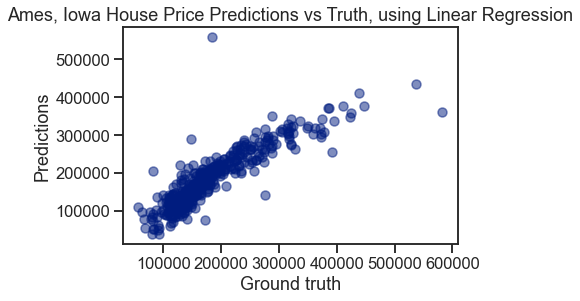

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


sns.set_context('talk')
sns.set_style('ticks')
sns.set_palette('dark')

ax = plt.axes()
# we are going to use y_test, y_test_pred
ax.scatter(y_test, y_test_pred, alpha=.5)

ax.set(xlabel='Ground truth', 
       ylabel='Predictions',
       title='Ames, Iowa House Price Predictions vs Truth, using Linear Regression');

**GUARDAR E IMPORTAR MODELOS**

In [35]:
import pickle
pickle.dump(LR, open('Modelo_lr1.p', 'wb'))

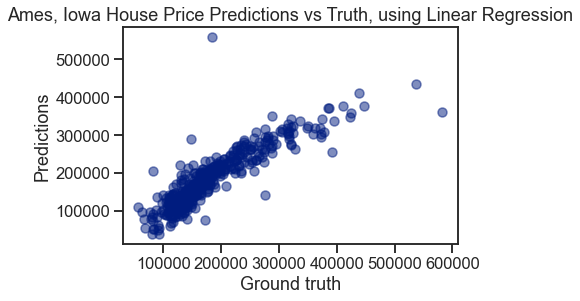

In [36]:
LR_loaded = pickle.load(open('Modelo_lr1.p', 'rb'))
y_NEW_pred = LR.predict(X_test)
ax = plt.axes()
# we are going to use y_test, y_test_pred
ax.scatter(y_test, y_NEW_pred, alpha=.5)

ax.set(xlabel='Ground truth', 
       ylabel='Predictions',
       title='Ames, Iowa House Price Predictions vs Truth, using Linear Regression');

#### Cross Validation

In [37]:
import numpy as np
import pickle
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline

In [38]:
boston = pickle.load(open('boston_housing_clean.pickle', "rb" ))
boston_data = boston['dataframe']
boston_description = boston['description']
boston_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [39]:
X = boston_data.drop('MEDV', axis=1)
y = boston_data.MEDV
kf = KFold(shuffle=True, random_state=72018, n_splits=3)
kf.split(X)

<generator object _BaseKFold.split at 0x000001AA63C1EB90>

In [40]:
for train_index, test_index in kf.split(X):
    print("Train index:", train_index[:10], len(train_index))
    print("Test index:",test_index[:10], len(test_index))
    print('')

Train index: [ 1  3  4  5  7  8 10 11 12 13] 337
Test index: [ 0  2  6  9 15 17 19 23 25 26] 169

Train index: [ 0  2  6  9 10 11 12 13 15 17] 337
Test index: [ 1  3  4  5  7  8 14 16 22 27] 169

Train index: [0 1 2 3 4 5 6 7 8 9] 338
Test index: [10 11 12 13 18 20 21 24 28 31] 168



In [41]:
scores = []

lr = LinearRegression()
s = StandardScaler()

for train_index, test_index in kf.split(X):
    X_train, X_test, y_train, y_test = (X.iloc[train_index, :], 
                                        X.iloc[test_index, :], 
                                        y[train_index], 
                                        y[test_index])
    
    X_train_s = s.fit_transform(X_train)
    
    lr.fit(X_train_s, y_train)
    
    X_test_s = s.transform(X_test)
    
    y_pred = lr.predict(X_test_s)

    score = r2_score(y_test.values, y_pred)
    
    scores.append(score)
    
scores

[0.6719348798472715, 0.748502005921238, 0.6976807323597745]

In [42]:
lr.coef_

array([-0.75001771,  0.99893116, -0.11948065,  0.93258812, -1.97177953,
        2.05526623,  0.84266037, -3.11439357,  3.09380353, -2.34636326,
       -2.32776077,  1.0086005 , -4.65340112])

***¿Engorroso? PIPELINES es la respuesta***

Los `Pipelines` permiten encadenar varios operadores que tengan un método fit.

`cross_val_predict` es una función que realiza una validación cruzada de K-fold para nosotros, ajustando y transformando adecuadamente en cada paso del camino.
Tenga en cuenta que cross_val_predict no usa el mismo modelo para todos los pasos; las predicciones para cada fila se realizan cuando esa fila está en el conjunto de validación. Realmente tenemos los resultados recopilados de 3 modelos diferentes.

Cuando hayamos terminado, **el estimador aún no está ajustado. Si queremos predecir con nuevos datos, todavía tenemos que entrenar a nuestro estimador**cross_val_predict es una función que realiza una validación cruzada de K-fold para nosotros, ajustando y transformando adecuadamente en cada paso del camino.

In [43]:
estimator = Pipeline([("scaler", s),
                      ("regression", lr)])

In [44]:
predictions = cross_val_predict(estimator, X, y, cv=kf) #Kf es nuestro KFold o puede ser un número y lo divide en esos conjuntos
r2_score(y, predictions) # Promedio

0.706353106416156

In [45]:
from sklearn.model_selection import cross_validate
cv_results = cross_validate(estimator, X, y, cv=kf, return_estimator=True)
for estimator in cv_results['estimator']:
    print(estimator['regression'].coef_)

[-1.19068294  1.00609809  0.85404329  0.475667   -2.32425907  3.43552157
 -0.42874115 -2.9639226   2.27126817 -2.07005495 -1.87848433  0.74045506
 -2.98766053]
[-0.8228934   1.21944452 -0.23387148  0.68053532 -1.71788813  2.48681863
 -0.35009192 -3.19205906  2.64378856 -2.01640377 -1.9675164   0.86812003
 -3.67628679]
[-0.75001771  0.99893116 -0.11948065  0.93258812 -1.97177953  2.05526623
  0.84266037 -3.11439357  3.09380353 -2.34636326 -2.32776077  1.0086005
 -4.65340112]


### Ajustando Hiperparámetros

In [46]:
estimator = Pipeline([("scaler", s),
                      ("regression", lr)])

In [47]:
scores = []
coefs = []
alphas = np.logspace(-9, 0,10)

# LASSO

for alpha in alphas:
    las = Lasso(alpha=alpha, max_iter=100000)
    
    estimator = Pipeline([
        ("scaler", s),
        ("lasso_regression", las)])

    predictions = cross_val_predict(estimator, X, y, cv = kf)
    
    score = r2_score(y, predictions)
    
    scores.append(score)

In [48]:
list(zip(alphas,scores))

[(1e-09, 0.7063531064981925),
 (1e-08, 0.7063531072356071),
 (1e-07, 0.7063531145602442),
 (1e-06, 0.7063531882052065),
 (1e-05, 0.7063539165191507),
 (0.0001, 0.706361268093463),
 (0.001, 0.706433467041546),
 (0.01, 0.7070865958083233),
 (0.1, 0.705838151167185),
 (1.0, 0.6512724532884888)]

In [49]:
Lasso(alpha=1e-6).fit(X, y).coef_

array([-1.07170372e-01,  4.63952623e-02,  2.08588308e-02,  2.68854318e+00,
       -1.77954207e+01,  3.80475296e+00,  7.50802707e-04, -1.47575348e+00,
        3.05654279e-01, -1.23293755e-02, -9.53459908e-01,  9.39253013e-03,
       -5.25467196e-01])

In [50]:
Lasso(alpha=1.0).fit(X, y).coef_

array([-0.06342255,  0.04916867, -0.        ,  0.        , -0.        ,
        0.94678567,  0.02092737, -0.66900864,  0.26417501, -0.01520915,
       -0.72319901,  0.00829117, -0.76143296])

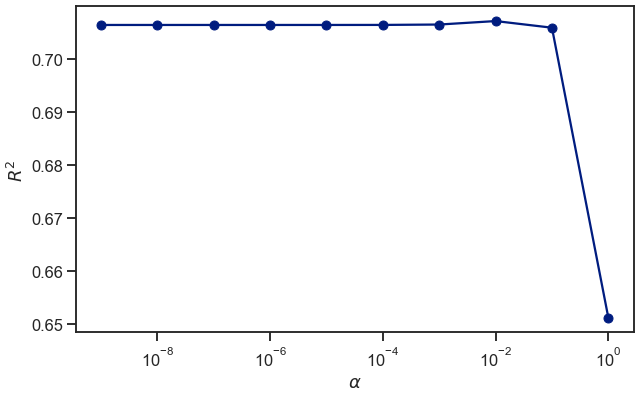

In [51]:
plt.figure(figsize=(10,6))
plt.semilogx(alphas, scores, '-o')
plt.xlabel('$\\alpha$')
plt.ylabel('$R^2$');

**Con Polinomial Features**

In [52]:
!pip install tdqm

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for tdqm: filename=tdqm-0.0.1-py3-none-any.whl size=1323 sha256=6f331c770ca69ce6739d2ea28c4a1b6c18b52da47c6633d7467ec4758f7790d0
  Stored in directory: c:\users\dell\appdata\local\pip\cache\wheels\37\31\b8\7b711038035720ba0df14376af06e5e76b9bd61759c861ad92
Successfully built tdqm


In [53]:
from tqdm import tqdm
pf = PolynomialFeatures(degree=2)

scores = []
alphas = alphas = np.logspace(-9, 0,10)
for alpha in tqdm(alphas):
    las = Lasso(alpha=alpha, max_iter=100000)
    
    estimator = Pipeline([
        ("scaler", s),
        ("make_higher_degree", pf),
        ("lasso_regression", las)])

    predictions = cross_val_predict(estimator, X, y, cv = kf)
    
    score = r2_score(y, predictions)
    
    scores.append(score)

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [06:52<00:00, 41.30s/it]


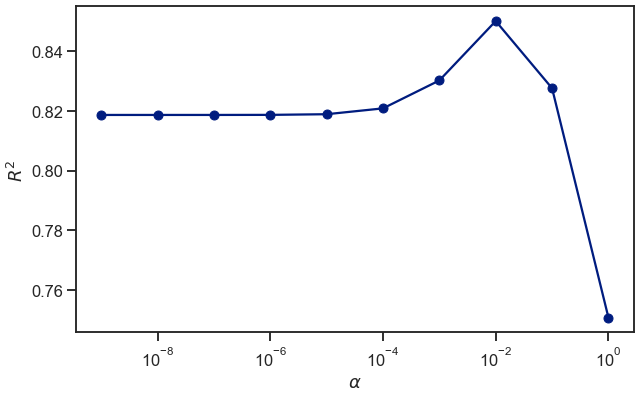

In [53]:
plt.figure(figsize=(10,6))
plt.semilogx(alphas, scores, '-o')
plt.xlabel('$\\alpha$')
plt.ylabel('$R^2$');

In [54]:
for i in zip(alphas,scores):
    print(i)

(1e-09, 0.8186082390790748)
(1e-08, 0.8186084636525315)
(1e-07, 0.8186107089210719)
(1e-06, 0.818633111845871)
(1e-05, 0.8188525013782122)
(0.0001, 0.820808008732788)
(0.001, 0.830157745011223)
(0.01, 0.8500341617667309)
(0.1, 0.8275457305937979)
(1.0, 0.7507800464064855)


**Y cuando se encuentren los mejores parámetros**

In [55]:
best_estimator = Pipeline([
                    ("scaler", s),
                    ("make_higher_degree", PolynomialFeatures(degree=2)),
                    ("lasso_regression", Lasso(alpha=0.01))])

best_estimator.fit(X, y)
best_estimator.score(X, y)

0.9241797703677183

In [56]:
best_estimator.named_steps["lasso_regression"].coef_

array([ 0.        ,  0.        ,  0.        ,  0.89576743,  0.        ,
       -1.2379132 ,  3.42996135, -1.45409732, -2.81278867,  0.09552996,
       -0.04749177, -0.48059771,  0.8527216 , -3.3079961 ,  0.11754404,
       -0.        ,  0.        ,  4.59961981, -0.51472196,  0.69238495,
       -0.        , -0.        , -0.78335584,  0.        , -0.        ,
       -0.1135307 ,  0.88515977,  0.15662733, -0.07243429, -0.04507525,
       -0.        ,  0.05231371, -0.14750539, -0.3435876 , -0.        ,
        1.08946116, -0.06583398, -0.        , -0.504731  ,  0.58570768,
        0.        ,  2.3604961 ,  0.937711  ,  0.23400448,  1.02253938,
       -0.        ,  0.15091893, -0.39936423,  0.16552476, -0.60300865,
        0.46048655, -0.90520874, -0.8646163 ,  0.22884895,  0.10712925,
       -0.12425553,  0.        , -0.19385065,  0.16805402, -0.43770119,
       -0.62373059, -0.06248739, -0.95426573,  1.17294554, -0.77112082,
        0.        , -0.83078648, -0.        ,  0.59248786,  0.16

In [57]:
pf = PolynomialFeatures(degree=2)

scoresR=[]
for alpha in tqdm(alphas):
    ridge = Ridge(alpha=alpha, max_iter=100000)

    estimator = Pipeline([
        ("scaler", s),
        ("polynomial_features", pf),
        ("ridge_regression", ridge)])

    predictions = cross_val_predict(estimator, X, y, cv = kf)
    score = r2_score(y, predictions)
    scoresR.append(score)

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 35.97it/s]


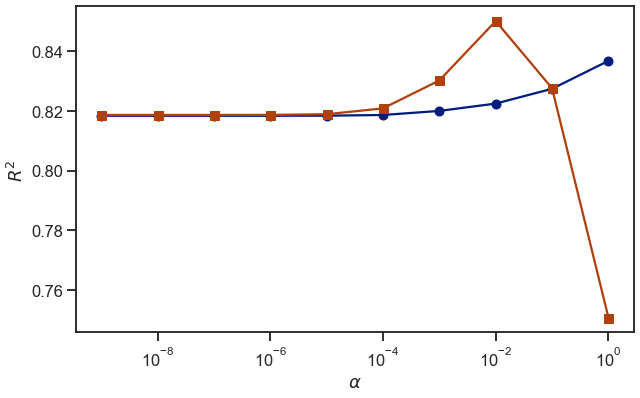

In [58]:
plt.figure(figsize=(10,6))
plt.semilogx(alphas, scoresR, '-o')
plt.semilogx(alphas, scores, '-s')
plt.xlabel('$\\alpha$')
plt.ylabel('$R^2$');
plt.xscale('log')

In [59]:
for i in zip(alphas,scoresR):
    print(i)

(1e-09, 0.8183314706294037)
(1e-08, 0.8183314966330684)
(1e-07, 0.818331756635833)
(1e-06, 0.8183343530589187)
(1e-05, 0.8183599758437033)
(0.0001, 0.8185927619280682)
(0.001, 0.8199590893226635)
(0.01, 0.822414801886244)
(0.1, 0.827369211867154)
(1.0, 0.8367096592832195)


In [60]:
col_names_dict = dict(zip(list(range(len(X.columns.values))), X.columns.values))
col_names_dict

{0: 'CRIM',
 1: 'ZN',
 2: 'INDUS',
 3: 'CHAS',
 4: 'NOX',
 5: 'RM',
 6: 'AGE',
 7: 'DIS',
 8: 'RAD',
 9: 'TAX',
 10: 'PTRATIO',
 11: 'B',
 12: 'LSTAT'}

In [61]:
df_importances = pd.DataFrame(zip(best_estimator.named_steps["make_higher_degree"].get_feature_names(),
                 best_estimator.named_steps["lasso_regression"].coef_,
))

In [62]:
df_importances.sort_values(by=1)

,0,1
90,x8^2,-4.803638
13,x12,-3.307996
8,x7,-2.812789
7,x6,-1.454097
85,x7 x8,-1.431074
...,...,...
79,x6 x8,2.002135
41,x2 x4,2.360496
6,x5,3.429961
91,x8 x9,4.083243


### GridSearchCV

In [63]:
from sklearn.model_selection import GridSearchCV

# Same estimator as before
estimator = Pipeline([("scaler", StandardScaler()),
        ("polynomial_features", PolynomialFeatures()),
        ("ridge_regression", Ridge())])

params = {
    'polynomial_features__degree': [1, 2, 3],
    'ridge_regression__alpha': np.geomspace(4, 20, 30)
}

grid = GridSearchCV(estimator, params, cv=kf)

In [64]:
grid.fit(X, y);
grid.best_score_, grid.best_params_

(0.8504982950750941,
 {'polynomial_features__degree': 2,
  'ridge_regression__alpha': 15.153673507519274})

In [65]:
y_predict = grid.predict(X)
r2_score(y, y_predict)

0.9149145594213685

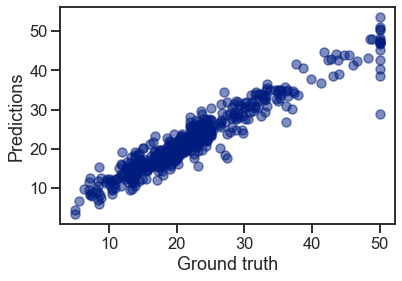

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


sns.set_context('talk')
sns.set_style('ticks')
sns.set_palette('dark')

ax = plt.axes()
# we are going to use y_test, y_test_pred
ax.scatter(y, y_predict, alpha=.5)

ax.set(xlabel='Ground truth', 
       ylabel='Predictions');